# Chapter 1
## The mechanics of learning

In [3]:
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd

In [6]:
torch_scalar = torch.tensor(3.14)
torch_vector= torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
torch_tensor3d = torch.tensor([[ [ 1, 2, 3],  [ 4, 5, 6],],
                               [ [ 7, 8, 9],  [10, 11, 12],],
                               [ [13, 14, 15],[16, 17, 18],],
                               [ [19, 20, 21],[22, 23, 24],] ])

In [9]:
print(torch_scalar)
print(torch_vector)
print(torch_matrix)
print(torch_tensor3d)

tensor(3.1400)
tensor([1, 2, 3, 4])
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24]]])


In [8]:
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)

torch.Size([])
torch.Size([4])
torch.Size([3, 4])
torch.Size([4, 2, 3])


In [15]:
# np.random.random: generate samples from the uniform distribution on [0, 1). 

x_np = np.random.random(size= (4, 4))
x_np

array([[0.36245885, 0.42311321, 0.15254803, 0.17324214],
       [0.13327834, 0.5438301 , 0.06629452, 0.95492494],
       [0.24984324, 0.41525938, 0.93958101, 0.86343883],
       [0.92636708, 0.47154115, 0.75937401, 0.7291053 ]])

In [16]:
x_pt =  torch.tensor(x_np)
x_pt

tensor([[0.3625, 0.4231, 0.1525, 0.1732],
        [0.1333, 0.5438, 0.0663, 0.9549],
        [0.2498, 0.4153, 0.9396, 0.8634],
        [0.9264, 0.4715, 0.7594, 0.7291]], dtype=torch.float64)

In [17]:
print(type(x_np))
print(type(x_pt))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [18]:
print(x_np.dtype)
print(x_pt.dtype)

float64
torch.float64


In [19]:
x_np = np.asarray(x_np, dtype= np.float32)
x_pt= torch.tensor(x_np, dtype= torch.float32)
print(x_np.dtype)
print(x_pt.dtype)

float32
torch.float32


Note: The main exception to using 32-bit floats or 64-bit integers as the dtype is when we need to perform logic operations (like Boolean AND, OR, NOT), which we can use to quickly create binary masks.

A mask is a tensor that tells us which portions of another tensor are valid to use. We
use masks in some of our more complex neural networks. For example, let’s say we want
to find every value greater than 0.5 in a tensor. Both PyTorch and NumPy let us use the
standard logic operators to check for things like this:


In [20]:
b_np = (x_np > 0.5)
b_np

array([[False, False, False, False],
       [False,  True, False,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

In [22]:
b_pt = (x_pt > 0.5)
b_pt

tensor([[False, False, False, False],
        [False,  True, False,  True],
        [False, False,  True,  True],
        [ True, False,  True,  True]])

In [24]:
print(b_np.dtype)
print(b_pt.dtype)

bool
torch.bool


In [25]:
print('is CUDA available?', torch.cuda.is_available())

is CUDA available? False


In [29]:
# device = torch.device('cuda')
# b_pt = b_pt.to(device)

<AxesSubplot:>

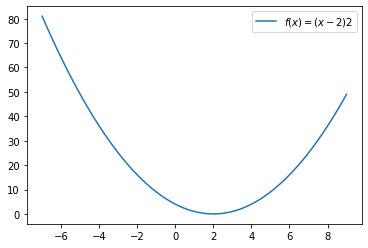

In [32]:
def f(x):
    return torch.pow((x - 2.0), 2)

x = np.linspace(-7, 9, 100)
y = f(torch.tensor(x)).numpy()

sns.lineplot(x= x, y= y, label = '$f(x) = (x-2)2$')

We can clearly see that the minimum of this function is at x = 2, where we get the value f(2) = 0. We denote the derivative of $f(x)$ as $f'(x)$, and we can get the answer (using calculus) that $f'(x) = 2x - 4$. The minimum of a function $(x^{*})$ exists at critical points, which are points where $f'(x) = 0$.

<AxesSubplot:>

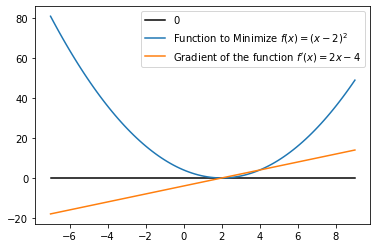

In [34]:
def fp(x):
    return (2*x) - 4

y_p= fp(torch.tensor(x)).numpy()
sns.lineplot(x = x, y= [0.0]*len(x), label = '0', color= 'black')
sns.lineplot(x= x, y = y, label= 'Function to Minimize $f(x) = (x-2)^2$')
sns.lineplot(x= x, y= y_p, label = "Gradient of the function $f'(x) = 2x-4 $")

## Calculating a derivative with automatic differentiation

In [39]:
x = torch.tensor([-3.5], requires_grad= True)
print(x)
print(x.grad)    #  We see there is no current gradient

tensor([-3.5000], requires_grad=True)
None


In [42]:
# let's try computing f(x)
value = f(x)
value

tensor([30.2500], grad_fn=<PowBackward0>)

Once we tell PyTorch to start calculating
gradients, it begins to keep track of every computation we do. It uses this information
to go backward and calculate the gradients for everything that was used and had a
requires_grad flag set to True.

Once we have a single scalar value, we can tell PyTorch to go back and use this
information to compute the gradients. This is done using the .backward() function,
after which we see a gradient in our original object:

In [43]:
value.backward()
print(x.grad)

tensor([-11.])


## Minimizing a function with derivatives

In [44]:
x = torch.tensor([-3.5], requires_grad= True)
x

tensor([-3.5000], requires_grad=True)

In [46]:
x_cur = x.clone()
x_cur

tensor([-3.5000], grad_fn=<CloneBackward0>)

In [47]:
x_prev = x_cur*100
epsilon = 1e-5     # threshold for the current and previous value to be close enough that we stop
eta = 0.1    # learning rate

while torch.linalg.norm(x_cur - x_prev) > epsilon:
    x_prev = x_cur.clone()    # Makes a clone so x_prev and x_cur don’t point to the same object
    value = f(x)
    value .backward()
    x.data -= eta * x.grad
    x.grad.zero_()
    x_cur = x.data
print(x_cur)

tensor([2.0000])


## Loading dataset objects

In [49]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml   #mnist 784, https://www.openml.org/d/554

In [50]:
X, y= fetch_openml('mnist_784', version= 1, return_X_y = True)
print(X.shape)

(70000, 784)


In [51]:
class SimpleDataset(Dataset):
    def __init__(self, X, y):
        super(SimpleDataset, self).__init__()
        self.X = X
        self.y = y
        
    def __getitem__(self, index):
        inputs = torch.tensor(self.X[index, :], dtype = torch.float32)
        targets = torch.tensor(int(self.y[index]), dtype = torch.int64)
        return inputs, targets
    
    def __len__(self):
        return self.X.shape[0]

In [54]:
dataset = SimpleDataset(X, y)    #  Makes a PyTorch dataset
print('Length:', len(dataset))

Length: 70000


### Creating a training and testing split

In [57]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size

print(train_size)
print(test_size)

56000
14000


In [61]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))

print("{} examples for training and {} for testing".format(len(train_dataset), len(test_dataset)))

56000 examples for training and 14000 for testing
